In [1]:
using Plots
using Graphs
using Random

# Lucas Schmidt Ferreira de Araujo

# Report 06

# Exercice I

In [2]:
function qvote(nt::Int , G::Graph,p,q)
    N = nv(G)
    S = zeros(nt,N)
    S[1,1:end] .= rand([-1,1] , N)

    for t in 1:nt-1
        Nodes =  collect(1:N)
        S[t+1,1:end] = S[t,1:end]
        for _ in 1:N
            i = rand(Nodes)
            #filter!(x -> x != i, Nodes)
            if( rand() < p )
                rand() > .5 ? S[t+1,i] = -S[t,i] : S[t+1,i] = S[t,i] 
            else
                nb = rand( neighbors(G,i) , q )
                S_nb = S[t,nb]
                if( abs(sum(S_nb)) == length(S_nb) )
                    S[t+1,i] = S_nb[1]
                else
                    S[t+1,i] = S[t,i]
                end
            end
        end
    end
    return S
end

function Stats(nsim,nt,G,p,q)
    m = zeros(nt)
    N = nv(G)
    for j in 1:nsim
        Sim = qvote(nt,G,p,q)
        m .= m .+ abs.( sum(Sim , dims = 2) ) ./ (nsim*N)
    end
    return m
end

Stats (generic function with 1 method)

## NN model

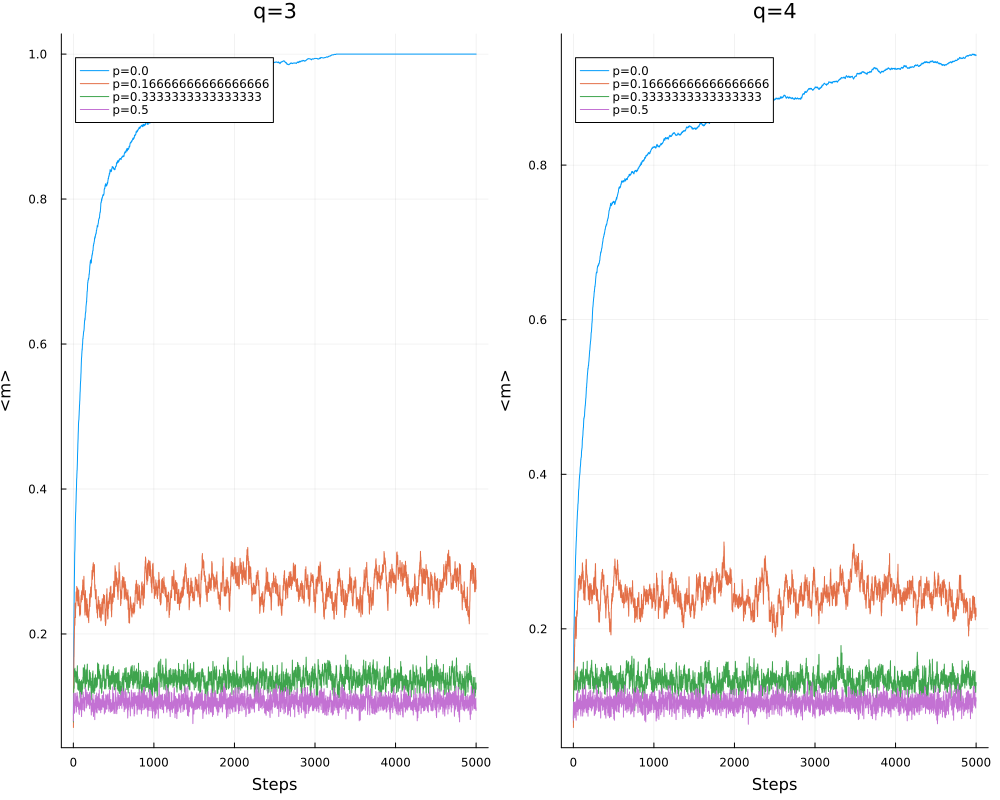

In [3]:
N = 10
G = Graphs.grid([N, N])

q1 = 3
q2 = 4
p = range(0, 0.5 ,4)
nt = 5000
nsim = 100
m1 = map( x -> Stats(nsim,nt,G,x,q1) , p)
m2 = map( x -> Stats(nsim,nt,G,x,q2) , p)

fig1 = plot(m1[1],label="p=$(p[1])",title="q=$(q1)")
plot!(m1[2],label="p=$(p[2])")
plot!(m1[3],label="p=$(p[3])")
plot!(m1[4],label="p=$(p[4])")

fig2 = plot(m2[1],label="p=$(p[1])",title="q=$(q2)")
plot!(m2[2],label="p=$(p[2])")
plot!(m2[3],label="p=$(p[3])")
plot!(m2[4],label="p=$(p[4])")

plot(fig1,fig2,size=(1000,800) , xlabel="Steps",ylabel="<m>")

## Watts-Strogatz Graph

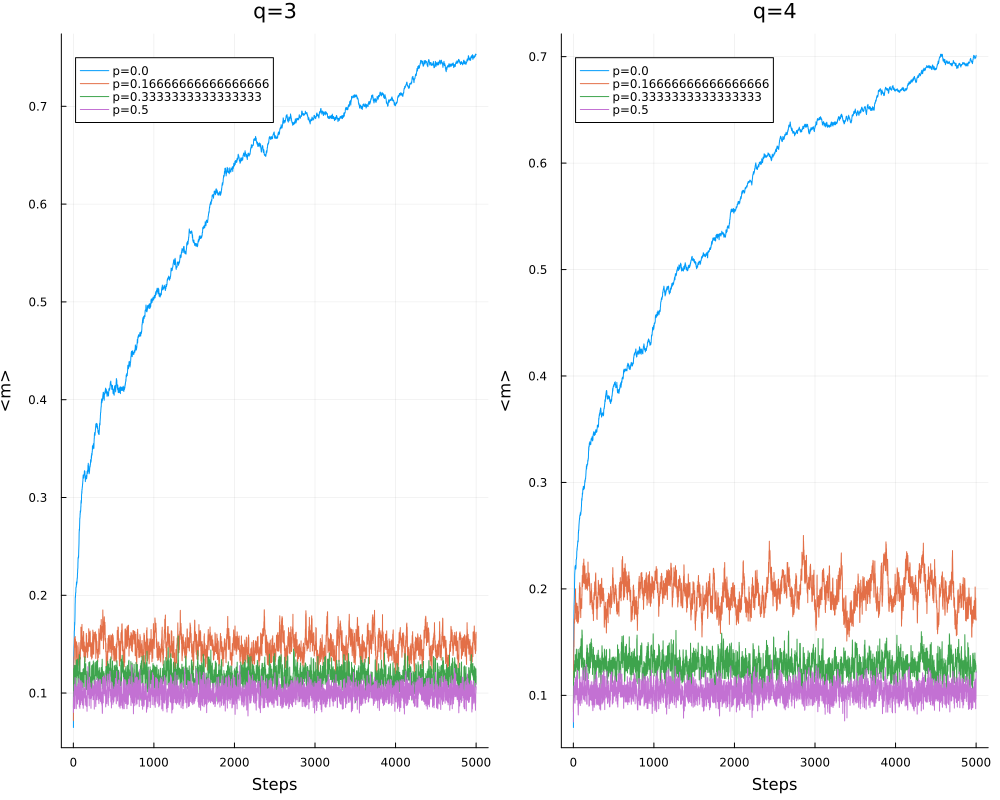

In [4]:
N = 100
q1 = 3
q2 = 4
β = .01
G1 = watts_strogatz(N,q1,β)
G2 = watts_strogatz(N,q2,β)


m1 = map( x -> Stats(nsim,nt,G1,x,q1) , p)
m2 = map( x -> Stats(nsim,nt,G2,x,q2) , p)

fig1 = plot(m1[1],label="p=$(p[1])",title="q=$(q1)")
plot!(m1[2],label="p=$(p[2])")
plot!(m1[3],label="p=$(p[3])")
plot!(m1[4],label="p=$(p[4])")

fig2 = plot(m2[1],label="p=$(p[1])",title="q=$(q2)")
plot!(m2[2],label="p=$(p[2])")
plot!(m2[3],label="p=$(p[3])")
plot!(m2[4],label="p=$(p[4])")

plot(fig1,fig2,size=(1000,800) , xlabel="Steps",ylabel="<m>")

## Barabasi-Albert Graph

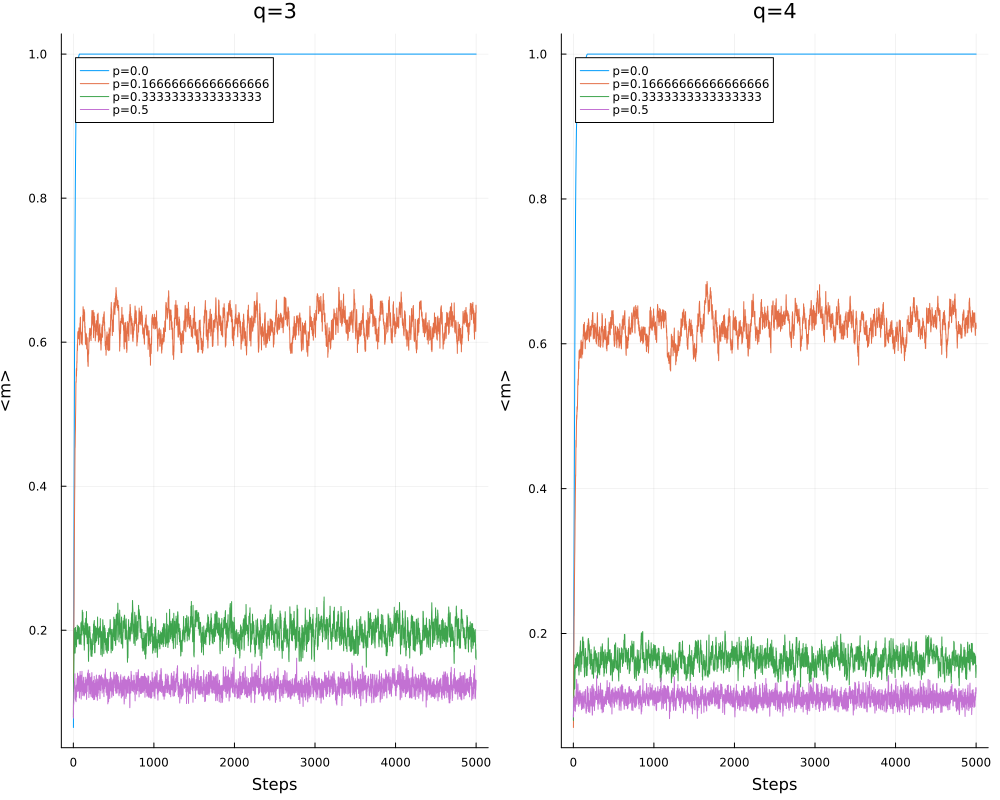

In [5]:
N = 100
q1 = 3
q2 = 4
G1 = barabasi_albert(N,q1)
G2 = barabasi_albert(N,q2)


m1 = map( x -> Stats(nsim,nt,G1,x,q1) , p)
m2 = map( x -> Stats(nsim,nt,G2,x,q2) , p)

fig1 = plot(m1[1],label="p=$(p[1])",title="q=$(q1)")
plot!(m1[2],label="p=$(p[2])")
plot!(m1[3],label="p=$(p[3])")
plot!(m1[4],label="p=$(p[4])")

fig2 = plot(m2[1],label="p=$(p[1])",title="q=$(q2)")
plot!(m2[2],label="p=$(p[2])")
plot!(m2[3],label="p=$(p[3])")
plot!(m2[4],label="p=$(p[4])")

plot(fig1,fig2,size=(1000,800) , xlabel="Steps",ylabel="<m>")

## Average Final Magnetization

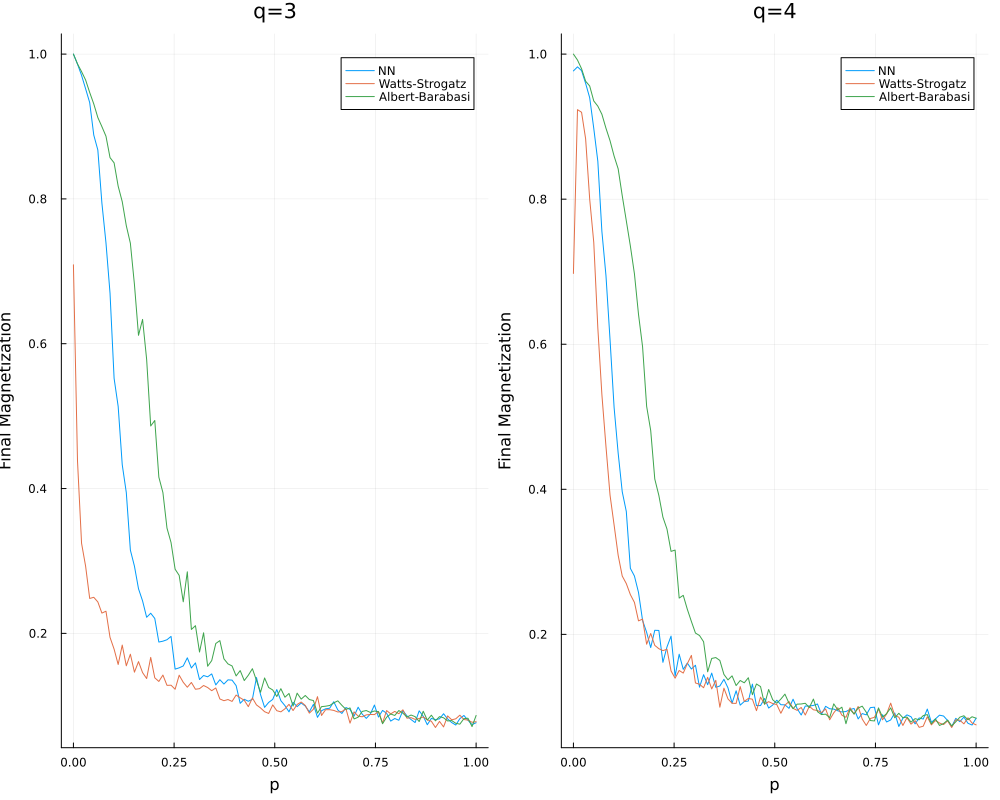

In [6]:
p = range(0,1,100)
G1 = Graphs.grid([10, 10])
G2 = watts_strogatz(100,3,.1)
G3 = barabasi_albert(100,3)

G4 = Graphs.grid([10, 10])
G5 = watts_strogatz(100,4,.1)
G6 = barabasi_albert(100,4)

m1 = [ Stats(nsim,nt,G1,x,3)[end] for x in p ]
m2 = [ Stats(nsim,nt,G2,x,3)[end] for x in p ]
m3 = [ Stats(nsim,nt,G3,x,3)[end] for x in p ]

m4 = [ Stats(nsim,nt,G4,x,4)[end] for x in p ]
m5 = [ Stats(nsim,nt,G5,x,4)[end] for x in p ]
m6 = [ Stats(nsim,nt,G6,x,4)[end] for x in p ]

fig1 = plot(p,m1,label="NN",title="q=3")
plot!(p,m2,label="Watts-Strogatz")
plot!(p,m3,label="Albert-Barabasi")

fig2 = plot(p,m4,label="NN",title="q=4")
plot!(p,m5,label="Watts-Strogatz")
plot!(p,m6,label="Albert-Barabasi")

plot(fig1,fig2,size=(1000,800),xlabel="p",ylabel="Final Magnetization")

## Watts-Strogatz

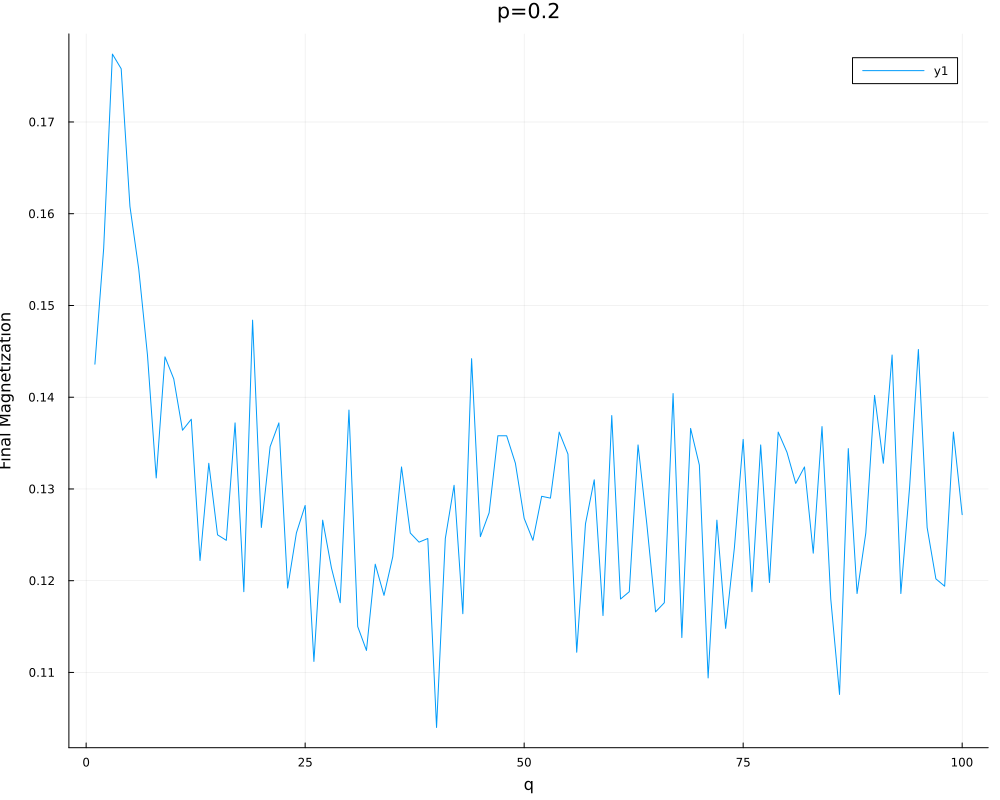

In [7]:
G = watts_strogatz(100,4,.01)
m = [ Stats(nsim,nt,G,.2,x)[end] for x in 1:100 ]
plot(m,xlabel="q",ylabel="Final Magnetization",title="p=0.2",size=(1000,800))